In [1]:
import pandas as pd
import sys
import os
sys.path.append(os.path.abspath('../scripts'))
from data_processing import * 
from eda import promo_distr as prd
from eda import *
from plots import *
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:

df = pd.read_csv('../data/cleaned.csv')
train, test, _ = load_data()
pd.set_option('display.max_columns', None)

2025-01-07 20:04:39,496 - INFO - Loading data from file...
2025-01-07 20:04:40,894 - INFO - Data loaded 


In [3]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [4]:

df.shape

(1017209, 23)


Data Summary and Statistics

In [5]:

df.head()


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,SalePerCustomer,is_holiday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
Date,,,,,,,,,,,,,,,,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1,2015,7,31,31,9.482883,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2015-07-31,2,5,6064,625,1,1,0,1,2015,7,31,31,9.702400,0,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2015-07-31,3,5,8314,821,1,1,0,1,2015,7,31,31,10.126675,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2015-07-31,4,5,13995,1498,1,1,0,1,2015,7,31,31,9.342457,0,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
2015-07-31,5,5,4822,559,1,1,0,1,2015,7,31,31,8.626118,0,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [6]:

df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Year,Month,Day,WeekOfYear,SalePerCustomer,is_holiday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,844340.000000,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,2.013832e+03,5.846762e+00,1.570279e+01,2.361551e+01,9.493619,3.052470e-02,5.422021e+03,4.926878e+00,1.370173e+03,5.005638e-01,1.164767e+01,1.007011e+03
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.773960e-01,3.326097e+00,8.787638e+00,1.443338e+01,2.197494,1.720261e-01,7.706918e+03,4.283543e+00,9.353634e+02,4.999999e-01,1.532393e+01,1.005877e+03
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.013000e+03,1.000000e+00,1.000000e+00,1.000000e+00,0.000000,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.013000e+03,3.000000e+00,8.000000e+00,1.100000e+01,7.895563,0.000000e+00,7.100000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.014000e+03,6.000000e+00,1.600000e+01,2.200000e+01,9.250000,0.000000e+00,2.325000e+03,4.000000e+00,2.006000e+03,1.000000e+00,1.000000e+00,2.009000e+03
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,2.014000e+03,8.000000e+00,2.300000e+01,3.500000e+01,10.899729,0.000000e+00,6.880000e+03,9.000000e+00,2.011000e+03,1.000000e+00,2.200000e+01,2.012000e+03
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,2.015000e+03,1.200000e+01,3.100000e+01,5.200000e+01,64.957854,1.000000e+00,7.586000e+04,1.200000e+01,2.015000e+03,1.000000e+00,5.000000e+01,2.015000e+03


In [7]:

# missing values
df.isnull().sum()

Store                             0
DayOfWeek                         0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
Year                              0
Month                             0
Day                               0
WeekOfYear                        0
SalePerCustomer              172869
is_holiday                        0
StoreType                         0
Assortment                        0
CompetitionDistance               0
CompetitionOpenSinceMonth         0
CompetitionOpenSinceYear          0
Promo2                            0
Promo2SinceWeek                   0
Promo2SinceYear                   0
PromoInterval                     0
dtype: int64

* The sales per customer null values are where customer number is zero in that day and store

### Exploration of customer purchasing behavior
sub-task 1
* Check for distribution in both training and test sets - are the   promotions distributed similarly between these two groups?|

           Train       Test
Promo                      
0      61.848548  60.416667
1      38.151452  39.583333


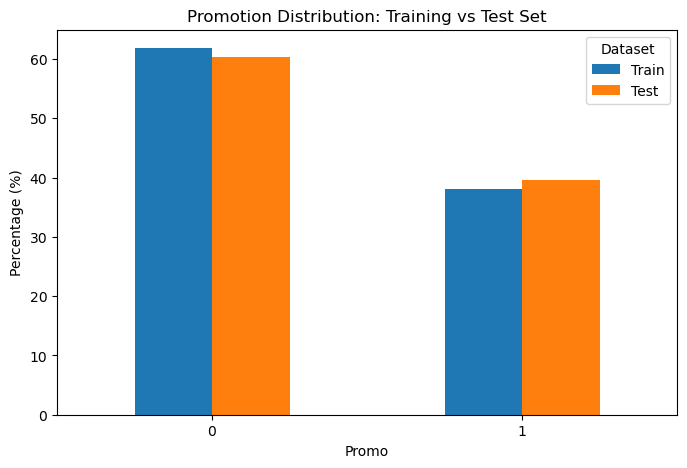

In [8]:
prd(train, test)

* The promotion distribution in train and test datasets looks similar.
* with 61.8% in training and 60.4% in test data has no promotion in a particular store and date.
* while 38.2% in train and 39.6% in test has promotion
#### sub-task 2
* Check & compare sales behavior before, during, and after holidays

In [9]:
# Extract unique holiday dates
dfsort= df.sort_index()
all_holiday_dates = dfsort[dfsort['is_holiday'] == 1].index.unique()


# Get sales behavior
sales_behavior = get_sales_behavior(dfsort, all_holiday_dates)

sales_comparison = pd.DataFrame(sales_behavior).T
sales_comparison.columns = ['Sales Before', 'Sales During', 'Sales After']
display(sales_comparison)

,Sales Before,Sales During,Sales After
2013-01-01,0,97235,6949829
2013-01-06,5951593,143904,10826848
2013-03-29,11417987,213921,9380402
2013-04-01,176418,241076,7362049
2013-05-01,10565093,200972,9884371
2013-05-09,7693180,233215,8481406
2013-05-20,226808,253936,7204456
2013-05-30,8885059,3422824,10913876
2013-08-15,8509505,7029537,8137427
2013-10-03,7168893,285518,8196635


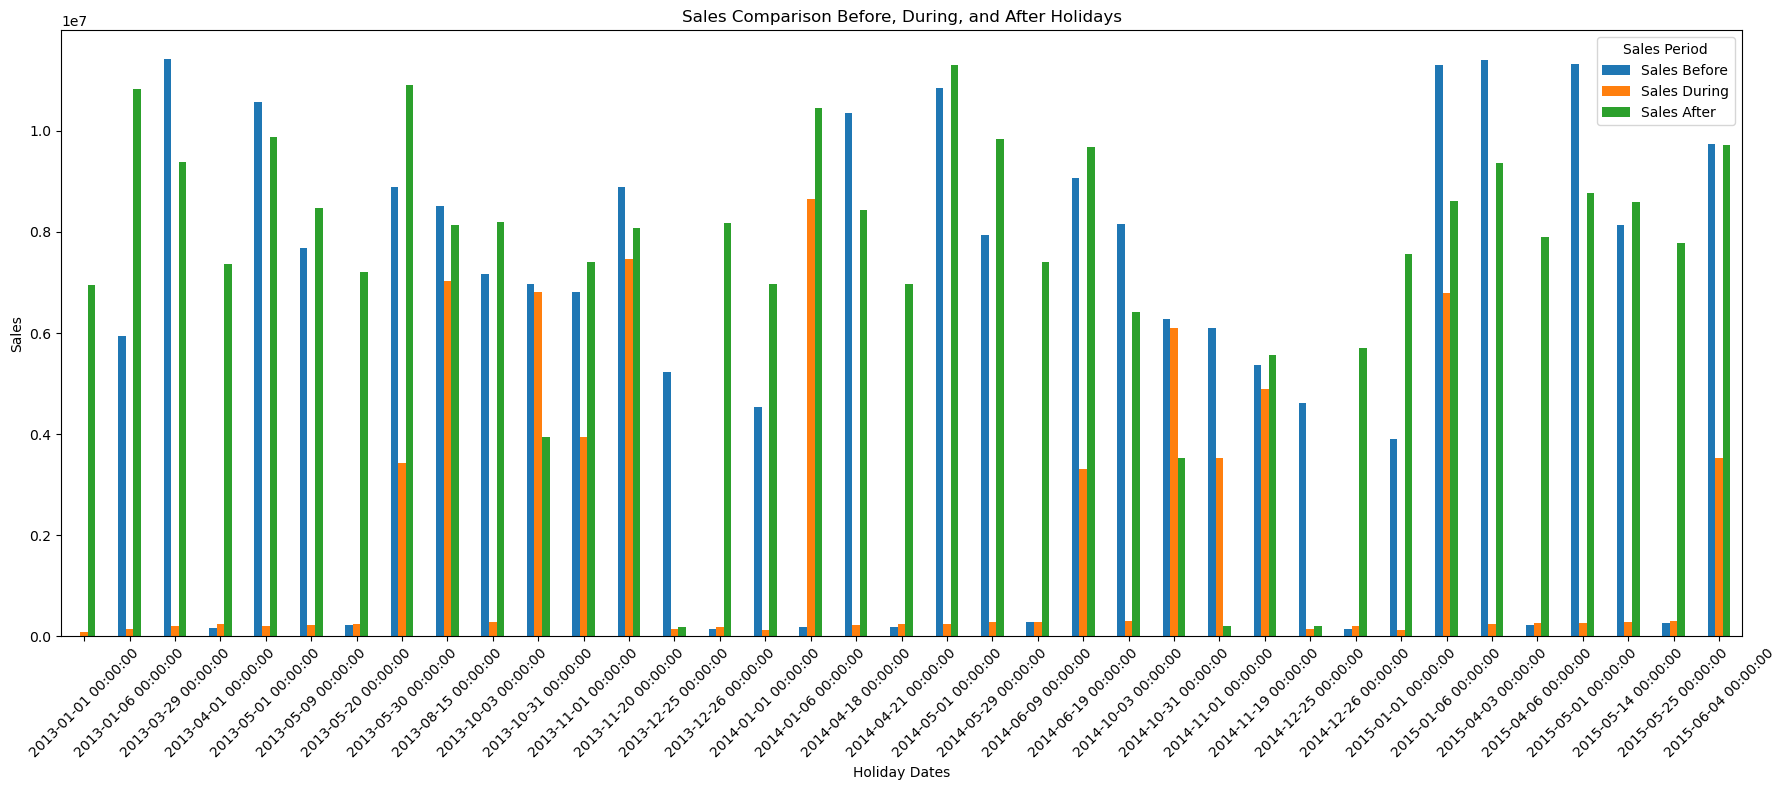

In [10]:
# Plotting the sales comparison
sales_comparison.plot(kind='bar', figsize=(18, 8))
plt.title('Sales Comparison Before, During, and After Holidays')
plt.ylabel('Sales')
plt.xlabel('Holiday Dates')
plt.xticks(rotation=45)
plt.legend(title='Sales Period')
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

### Insights

* the fuction returns total sales in before, during and after the holiday
* The sales are high before and after the holidays.
* High sale in holiday is seen in 2014-01-06 in Epiphany holiday.
* The sales in holidays drop significantly in New year.


#### sub-task 3
Find out any seasonal (Christmas, Easter, etc) purchase behaviors.

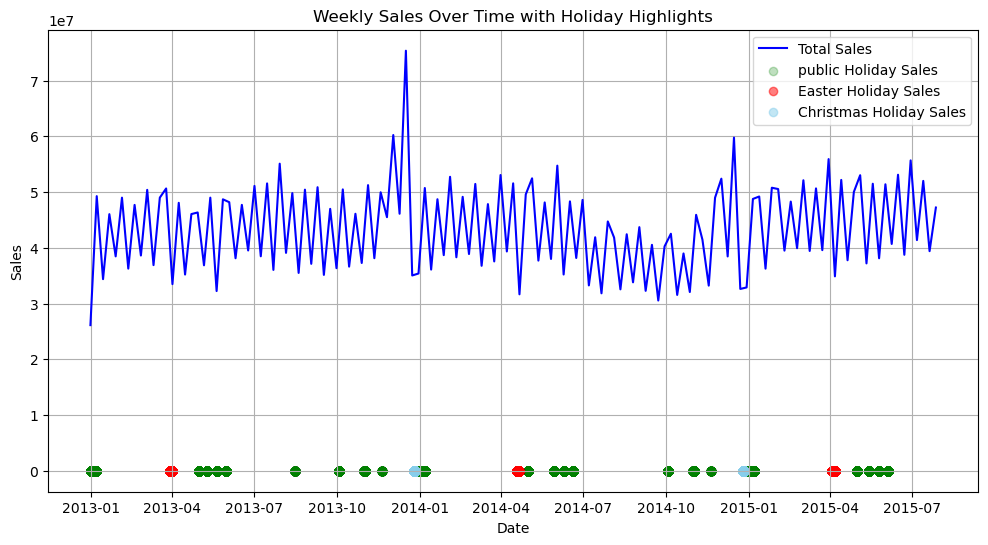

In [11]:
salesholiday(df)


In [12]:
weeklymaxmin(df)

The week with the highest sales is: 2013-12-22
Total sales for that week: 75371329

The week with the lowest sales is: 2013-01-06
Total sales for that week: 26129335


### Insights

* The sales increase in the week of Easter and Christmas
* while in the day of holiday the sales decreases and after the holiday it starts to rise again.
* The highest sales are recorded in the Christmas week and
* The lowest sales are recorded after the new year

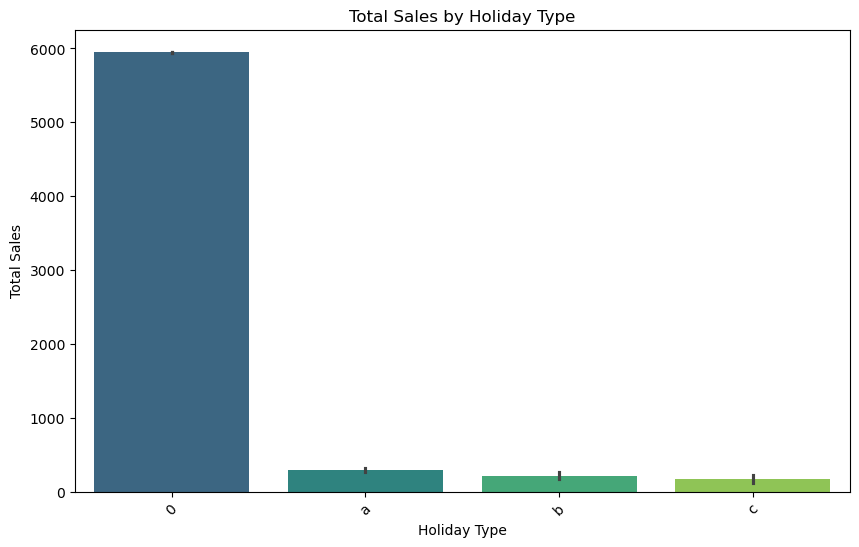

In [13]:
salesbyholiday(df)

* Sales in public holidays are many compared to Easter and Christmas
* Sales in Christmas is very low.

#### sub-task 4
* What can you say about the correlation between sales and the number of customers?

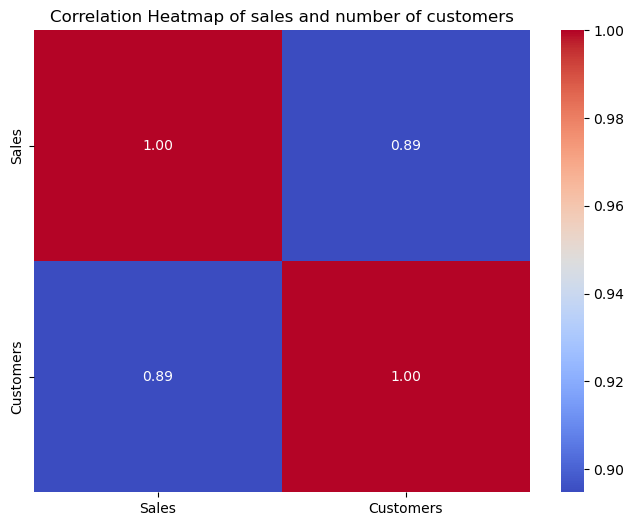

In [14]:
correlationsc(df)

#### Insights

* There is a high positive correlation between number of customers and sales
* number of sales and customer has a linear relationship which is close to 1.

#### sub-task -5
* How does promo affect sales? Are the promos attracting more customers? How does it affect already existing customers?

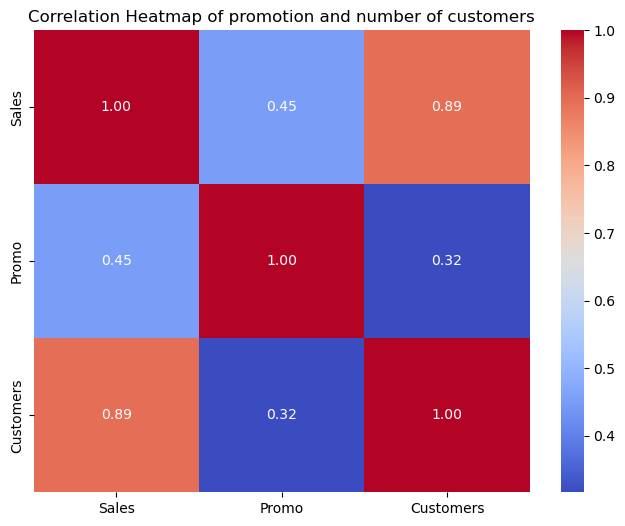

In [15]:
correlationspc(df)

#### Insights

* There is a high positive correlation between number of customers and sales
* number of sales and customer has a linear relationship which is close to 1.

#### sub-task-6
Trends of customer behavior during store opening and closing times

In [16]:
df[df['Open']==0]['Customers'].unique()

array([0], dtype=int64)

2025-01-07 20:15:06,417 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-01-07 20:15:06,444 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


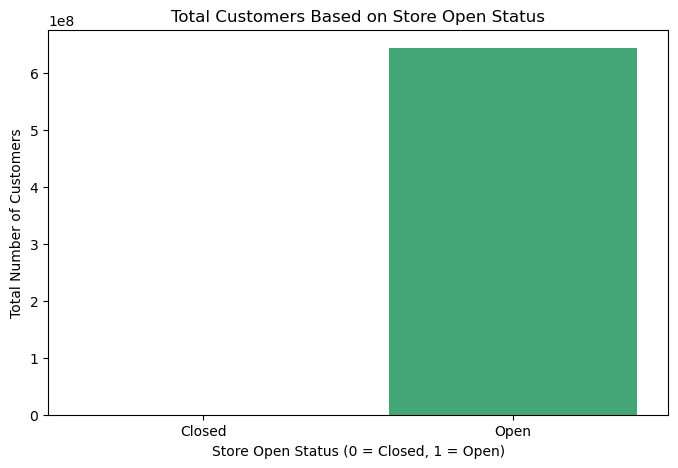

In [17]:
# Group by 'open' status and sum the number of customers
customer_trends = df.groupby('Open')['Customers'].sum().reset_index()

# Rename the columns for clarity
customer_trends.columns = ['Open Status', 'Total Customers']

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(x='Open Status', y='Total Customers', data=customer_trends, palette='viridis')
plt.title('Total Customers Based on Store Open Status')
plt.xlabel('Store Open Status (0 = Closed, 1 = Open)')
plt.ylabel('Total Number of Customers')
plt.xticks(ticks=[0, 1], labels=['Closed', 'Open'])
plt.show()

#### Insights

Customers don't go to stores when stores are closed

#### Weekday
Which stores are open on all weekdays? How does that affect their sales on weekends?

In [18]:
# Define weekdays (1 to 5 for Monday to Friday)
weekdays = [ 1, 2, 3, 4, 5]

# Filter for weekdays and group by store
weekday_data = df[df['DayOfWeek'].isin(weekdays)]

# Count how many distinct weekdays each store is open
stores_open_weekdays = weekday_data.groupby('Store')['Open'].sum()

# Identify stores that are open on all weekdays
stores_open_all_weekdays = stores_open_weekdays[stores_open_weekdays == 5].index

# Check the number of stores open on all weekdays
num_stores_open_all_weekdays = len(stores_open_all_weekdays)
print(f"Number of stores open on all weekdays: {num_stores_open_all_weekdays}")

# Print results
print("Stores open on all weekdays:")
print(stores_open_all_weekdays)

Number of stores open on all weekdays: 0
Stores open on all weekdays:
Index([], dtype='int64', name='Store')


* no stores are open all week days

#### Assortment type effect on number of customer and sales

In [19]:
assortment = df.groupby('Assortment').agg(
    Number_of_Stores=('Store', 'nunique') ,
    Total_Customers=('Customers', 'sum'),
    Total_Sales=('Sales', 'sum'),
    Sales_per_store=('Sales', lambda x: x.sum() / x.nunique())
    
)

display(assortment)

,Number_of_Stores,Total_Customers,Total_Sales,Sales_per_store
Assortment,,,,
a,593,332766938,2945750070,157182.117817
b,9,16972525,70946312,11602.013410
c,513,294302292,2856484241,145316.388106


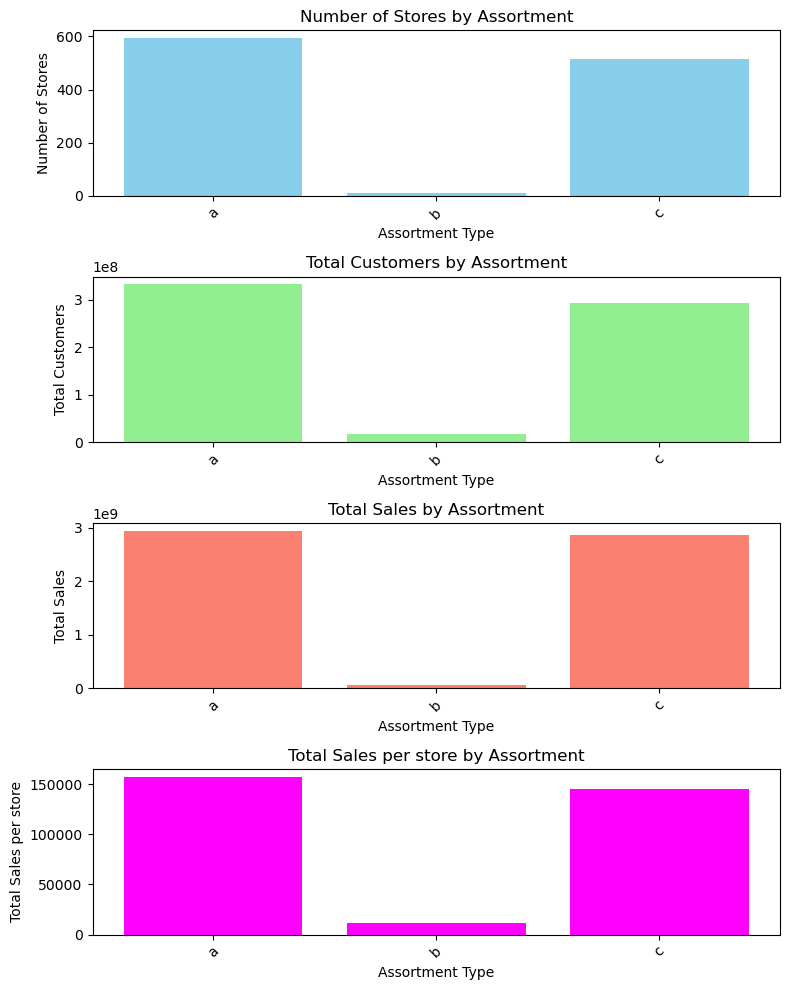

In [20]:
# Create subplots with 3 rows and 1 column
fig, axs = plt.subplots(4, 1, figsize=(8, 10))

# Plot Number of Stores
axs[0].bar(assortment.index, assortment['Number_of_Stores'], color='skyblue')
axs[0].set_title('Number of Stores by Assortment')
axs[0].set_xlabel('Assortment Type')
axs[0].set_ylabel('Number of Stores')
axs[0].tick_params(axis='x', rotation=45)

# Plot Total Customers
axs[1].bar(assortment.index, assortment['Total_Customers'], color='lightgreen')
axs[1].set_title('Total Customers by Assortment')
axs[1].set_xlabel('Assortment Type')
axs[1].set_ylabel('Total Customers')
axs[1].tick_params(axis='x', rotation=45)

# Plot Total Sales
axs[2].bar(assortment.index, assortment['Total_Sales'], color='salmon')
axs[2].set_title('Total Sales by Assortment')
axs[2].set_xlabel('Assortment Type')
axs[2].set_ylabel('Total Sales')
axs[2].tick_params(axis='x', rotation=45)

# Plot Total Sales
axs[3].bar(assortment.index, assortment['Sales_per_store'], color='magenta')
axs[3].set_title('Total Sales per store by Assortment')
axs[3].set_xlabel('Assortment Type')
axs[3].set_ylabel('Total Sales per store')
axs[3].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

##### Insights

* 593 stores have basic level assortment

* 513 stores have extended level assortment

* only 9 stores have extra level assortment

* Extra level assortment has the lowest stores, number of customers

* Basic leve assortment has the highest number of store and customers

#### Store type effect on number of customer and sales

In [21]:
storetype = df.groupby('StoreType').agg(
    Number_of_Stores=('Store', 'nunique') ,
    Total_Customers=('Customers', 'sum'),
    Total_Sales=('Sales', 'sum'),
    Sales_per_store=('Sales', lambda x: x.sum() / x.nunique())
    
)

display(storetype)

,Number_of_Stores,Total_Customers,Total_Sales,Sales_per_store
StoreType,,,,
a,602,363541434,3165334859,155636.486331
b,17,31465621,159231395,15749.890702
c,148,92129705,783221426,55531.865145
d,348,156904995,1765392943,118753.729517


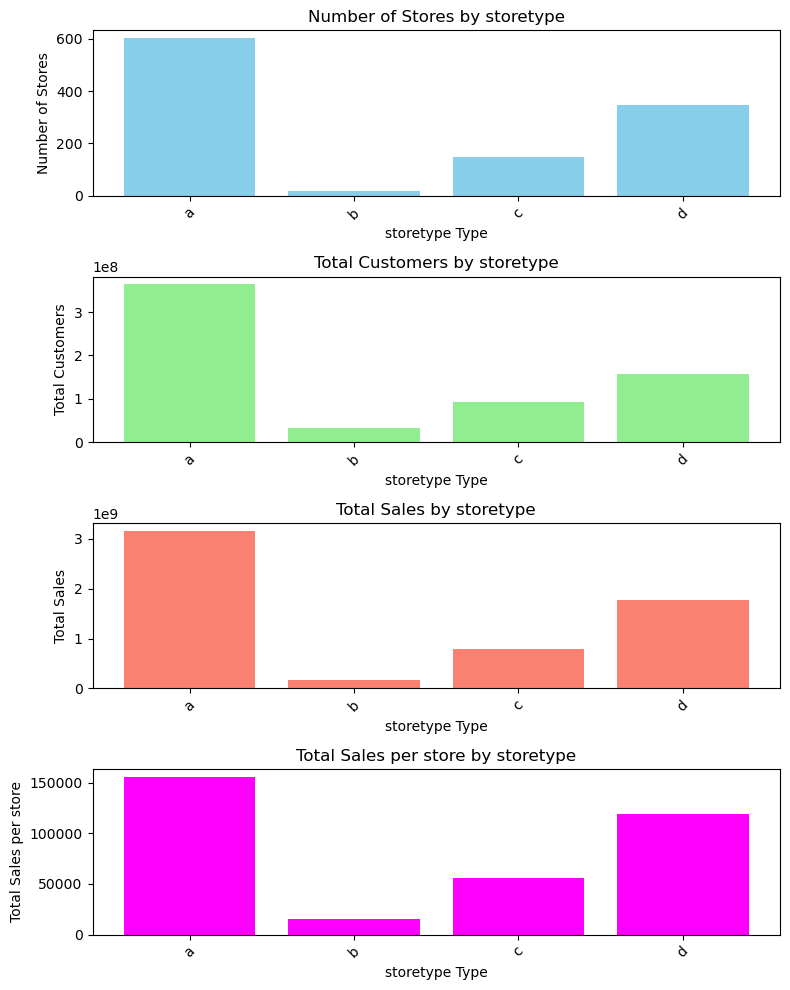

In [22]:
# Create subplots with 3 rows and 1 column
fig, axs = plt.subplots(4, 1, figsize=(8, 10))

# Plot Number of Stores
axs[0].bar(storetype.index, storetype['Number_of_Stores'], color='skyblue')
axs[0].set_title('Number of Stores by storetype')
axs[0].set_xlabel('storetype Type')
axs[0].set_ylabel('Number of Stores')
axs[0].tick_params(axis='x', rotation=45)

# Plot Total Customers
axs[1].bar(storetype.index, storetype['Total_Customers'], color='lightgreen')
axs[1].set_title('Total Customers by storetype')
axs[1].set_xlabel('storetype Type')
axs[1].set_ylabel('Total Customers')
axs[1].tick_params(axis='x', rotation=45)

# Plot Total Sales
axs[2].bar(storetype.index, storetype['Total_Sales'], color='salmon')
axs[2].set_title('Total Sales by storetype')
axs[2].set_xlabel('storetype Type')
axs[2].set_ylabel('Total Sales')
axs[2].tick_params(axis='x', rotation=45)

# Plot Total Sales
axs[3].bar(storetype.index, storetype['Sales_per_store'], color='magenta')
axs[3].set_title('Total Sales per store by storetype')
axs[3].set_xlabel('storetype Type')
axs[3].set_ylabel('Total Sales per store')
axs[3].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

#### Insights

* The highest store type a has 602 stores
* only 17 stores have store type b
* In order of increasing store type b, c, d, a
* The order is also reflected on number of customers, sale turnovers and sales per customer

In [23]:

df

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,SalePerCustomer,is_holiday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Week,HolidayType
Date,,,,,,,,,,,,,,,,,,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1,2015,7,31,31,9.482883,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015-07-27/2015-08-02,NaN
2015-07-31,2,5,6064,625,1,1,0,1,2015,7,31,31,9.702400,0,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015-07-27/2015-08-02,NaN
2015-07-31,3,5,8314,821,1,1,0,1,2015,7,31,31,10.126675,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015-07-27/2015-08-02,NaN
2015-07-31,4,5,13995,1498,1,1,0,1,2015,7,31,31,9.342457,0,c,c,620.0,9.0,2009.0,0,0.0,0.0,0,2015-07-27/2015-08-02,NaN
2015-07-31,5,5,4822,559,1,1,0,1,2015,7,31,31,8.626118,0,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0,2015-07-27/2015-08-02,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-01-01,1111,2,0,0,0,0,a,1,2013,1,1,1,NaN,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",2012-12-31/2013-01-06,Public Holiday
2013-01-01,1112,2,0,0,0,0,a,1,2013,1,1,1,NaN,1,c,c,1880.0,4.0,2006.0,0,0.0,0.0,0,2012-12-31/2013-01-06,Public Holiday
2013-01-01,1113,2,0,0,0,0,a,1,2013,1,1,1,NaN,1,a,c,9260.0,0.0,0.0,0,0.0,0.0,0,2012-12-31/2013-01-06,Public Holiday
